<a href="https://colab.research.google.com/github/Ankur099IIT/Natural-Language-Processing-Course-3-Deeplearning.ai/blob/main/Generating_text_from_Irish_lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

--2022-05-10 09:49:45--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2022-05-10 09:49:46 (98.3 MB/s) - ‘irish-lyrics-eof.txt’ saved [68970/68970]



In [2]:
# load the data

data = open('/content/irish-lyrics-eof.txt').read()
data

'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep your garden fair\nLet no man steal away your thyme\nFor thyme it is a precious thing\nAnd thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nThyme, brings all things to my mind\nOnce I and a bunch of thyme\ni thought it never would decay\nThen came a lusty sailor\nWho chanced to pass my way\nAnd stole my bunch of thyme away\nThe sailor gave to me a rose\nA rose that never would decay\nHe gave it to me to keep me reminded\nOf when he stole my thyme away\nSleep, my child, and peace attend thee\nAll through the night\nGuardian angels God will send thee\nSoft the drowsy hours are creeping\nHill and dale in slumber sleeping\nI my loving vigil keeping\nWhile the moon her watch is keeping\nWhile the weary world is sleeping\nOer thy spirit gently stealing\nVisions of delight revealing\nBreathes a pure and holy feeling\nThough I roam a minstrel lonely\nMy t

In [3]:
corpus = data.lower()
corpus

'come all ye maidens young and fair\nand you that are blooming in your prime\nalways beware and keep your garden fair\nlet no man steal away your thyme\nfor thyme it is a precious thing\nand thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nthyme, brings all things to my mind\nonce i and a bunch of thyme\ni thought it never would decay\nthen came a lusty sailor\nwho chanced to pass my way\nand stole my bunch of thyme away\nthe sailor gave to me a rose\na rose that never would decay\nhe gave it to me to keep me reminded\nof when he stole my thyme away\nsleep, my child, and peace attend thee\nall through the night\nguardian angels god will send thee\nsoft the drowsy hours are creeping\nhill and dale in slumber sleeping\ni my loving vigil keeping\nwhile the moon her watch is keeping\nwhile the weary world is sleeping\noer thy spirit gently stealing\nvisions of delight revealing\nbreathes a pure and holy feeling\nthough i roam a minstrel lonely\nmy t

In [4]:
corpus = corpus.split('\n')
print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

In [5]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer  = Tokenizer()

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

print(total_words)

2690


In [6]:
print(corpus)

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

In [7]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [8]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]

  for i in range(1, len(token_list)):
    input_sequences.append(token_list[:i+1])

max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = pad_sequences(input_sequences, maxlen= max_sequence_len, padding = 'pre')

print(input_sequences)


[[   0    0    0 ...    0   51   12]
 [   0    0    0 ...   51   12   96]
 [   0    0    0 ...   12   96 1217]
 ...
 [   0    0    0 ...    0   47  105]
 [   0    0    0 ...   47  105  138]
 [   0    0    0 ...  105  138  184]]


In [9]:
input_sequences.shape

(12038, 16)

In [10]:
xs = input_sequences[:, :-1]
labels = input_sequences[:,-1]

In [11]:
xs.shape, labels.shape

((12038, 15), (12038,))

In [12]:
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [13]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len - 1),   # max_sequence_len - 1 (number of columns in xs/training_data shape)                  
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
        tf.keras.layers.Dense(total_words, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [14]:
history =  model.fit(xs, ys, epochs = 100)

Epoch 1/100
377/377 [==============================] - 15s 9ms/step - loss: 6.7741 - accuracy: 0.0651
Epoch 2/100
377/377 [==============================] - 3s 9ms/step - loss: 6.2487 - accuracy: 0.0744
Epoch 3/100
377/377 [==============================] - 3s 9ms/step - loss: 5.9897 - accuracy: 0.0845
Epoch 4/100
377/377 [==============================] - 3s 9ms/step - loss: 5.6965 - accuracy: 0.0967
Epoch 5/100
377/377 [==============================] - 3s 9ms/step - loss: 5.3654 - accuracy: 0.1125
Epoch 6/100
377/377 [==============================] - 3s 9ms/step - loss: 5.0095 - accuracy: 0.1337
Epoch 7/100
377/377 [==============================] - 3s 9ms/step - loss: 4.6616 - accuracy: 0.1516
Epoch 8/100
377/377 [==============================] - 3s 9ms/step - loss: 4.3217 - accuracy: 0.1795
Epoch 9/100
377/377 [==============================] - 3s 9ms/step - loss: 3.9777 - accuracy: 0.2174
Epoch 10/100
377/377 [==============================] - 3s 9ms/step - loss: 3.6441 - accur

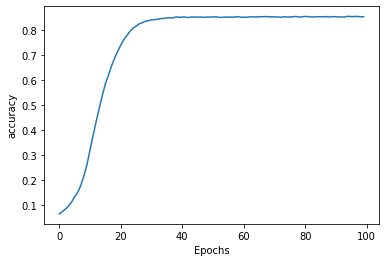

In [15]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [17]:
import numpy as np


# Define seed text
seed_text = "Ankur is funny but he never hurts others"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result	
print(seed_text)

Ankur is funny but he never hurts others take my mary so well love his now im warm loud to rest ye know when i had a bride by tree to its green home in bondage there in dublin home down again for advance rosin the bow road are fresh and play the new street he sent the sea ones loud down your room for your breast for the night are they had best best strength had gone away from ye a rose fol his fathers bubblin li when you paddys bride for to go new bower to fray your hat again road and then will you you
